In [32]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

#subroutine to read in all experiments from single excel file
def readData(fname):
    xl = pd.ExcelFile(fname)
    sheet_names = xl.sheet_names #)  # see all sheet names
    #print(sheet_names)
    istart=0
    for sheet_name in sheet_names:
        if sheet_name=='Metadata':
            continue
        ds1 = xl.parse(sheet_name,header=0,skiprows=1)
        if istart==0:
            ds=ds1
            istart=1
        else:
            ds=pd.concat([ds,ds1]) #ds.append(ds1)
        #print(type(ds1))
        #print(type(ds))
        print(sheet_name,len(ds))
    return ds


In [33]:
adir = 'C:/Users/gentemann/Google Drive/f_drive/docs/papers/in_prep/dave/'
file = adir + 'Duplicate_Master_Data_Jump_Test_2014_2017_2018.xlsx'
ds = readData(file)
df = pd.DataFrame(ds)


2017_1 105
2017_2 210
2017_3 312
2017_4 413
2017_5 515
2017_6 615
2017_7 714
2017_8 815
2017_9 916
2017_10 1016
2017_11 1118
2017_12 1220
2017_14 1318
2017_15 1422
2017_16 1524
2017_17 1625
2017_18 1732
2017_20 1826
2018_1 1929
2018_2 2032
2018_3 2145
2018_4 2247
2018_5 2359
2018_6 2764


In [34]:
#get some info about the data
#print out number of fish per experiment for table on data
print(ds.groupby('Experiment_number').fish_number.max())
cond_6 = (ds.height_difference<8)  #6" jumps
cond_12 = (ds.height_difference>8) & (ds.height_difference<14)  #12" jumps
cond_18 = (ds.height_difference>14)  #18" jumps
subset = ds[cond_6]
print('6',subset.groupby('Experiment_number').fish_number.max())
subset = ds[cond_12]
print('12',subset.groupby('Experiment_number').fish_number.max())
subset = ds[cond_18]
print('18',subset.groupby('Experiment_number').fish_number.max())


Experiment_number
2017_1     105
2017_10    100
2017_11    102
2017_12    102
2017_14     98
2017_15    104
2017_16    102
2017_17    101
2017_18    107
2017_2     105
2017_20     94
2017_3     102
2017_4     101
2017_5     102
2017_6     100
2017_7      99
2017_8     101
2017_9     101
2018_1     103
2018_2     103
2018_3     113
2018_4     102
2018_5     112
2018_6     405
Name: fish_number, dtype: int64
6 Experiment_number
2017_10    100
2017_17    101
2017_18    107
2017_4     101
2017_5     102
2017_6     100
2017_7      99
2018_2     103
2018_3     113
2018_4     102
2018_5     112
Name: fish_number, dtype: int64
12 Experiment_number
2017_1     105
2017_11    102
2017_12    102
2017_14     98
2017_15    104
2017_16    102
2017_2     105
2017_20     94
2017_3     102
2017_8     101
2017_9     101
2018_1     103
Name: fish_number, dtype: int64
18 Experiment_number
2018_6    405
Name: fish_number, dtype: int64


In [35]:
cond_lower = (ds.successful_jump==0)   # stayed in lower pool, unsuccessful jumper
cond_upper = (ds.successful_jump==1)  #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


C:\Users\gentemann\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


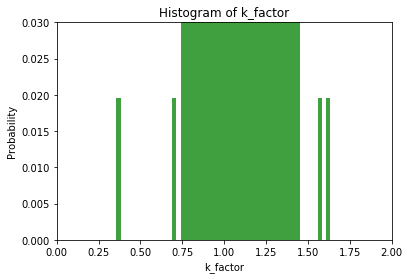

In [36]:
# the histogram of the data
fig = plt.figure()
n, bins, patches = plt.hist(subset_lower.k_factor, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('k_factor')
plt.ylabel('Probability')
plt.title('Histogram of k_factor')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([0, 2, 0, 0.03])
#plt.grid(True)
fig.savefig(adir+'hist.png', dpi=300)

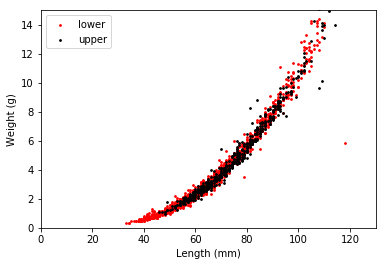

In [93]:
#plot all fish
cond_lower = (ds.successful_jump==0)   # stayed in lower pool, unsuccessful jumper
cond_upper = (ds.successful_jump==1)  #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 130,0, 15])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'all_scatter.png', dpi=300)

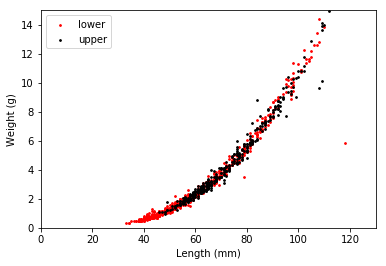

In [94]:
#6" jumps
cond_lower = ((ds.successful_jump==0) & (ds.height_difference<10))  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & (ds.height_difference<10)) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 130,0, 15])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'six_scatter.png', dpi=300)

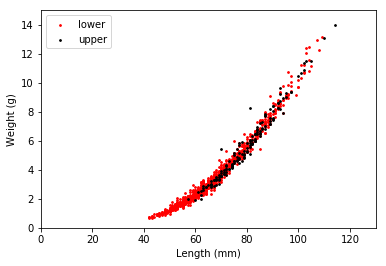

In [96]:
#12" jumps
cond_lower = ((ds.successful_jump==0) & (ds.height_difference>9) & (ds.height_difference<15))  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & (ds.height_difference>9) & (ds.height_difference<15)) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 130,0, 15])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'twelve_scatter.png', dpi=300)

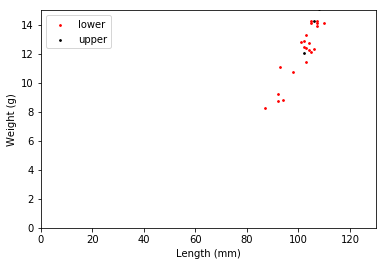

In [97]:
#12" jumps
cond_lower = ((ds.successful_jump==0) & (ds.height_difference>15))  # stayed in lower pool, unsuccessful jumper
cond_upper = ((ds.successful_jump==1) & (ds.height_difference>15)) #made it to upper pool
subset_upper = ds[cond_upper]
subset_lower = ds[cond_lower]
fig = plt.figure()
h=plt.scatter(subset_lower.length,subset_lower.weight,color='r',marker='.',s=12,label="lower")
h=plt.scatter(subset_upper.length,subset_upper.weight,color='k',marker='.',s=12,label="upper")
plt.axis([0, 130,0, 15])
plt.ylabel('Weight (g)')
plt.xlabel('Length (mm)')
plt.legend()
fig.savefig(adir+'eighteen_scatter.png', dpi=300)

In [82]:
ds.columns

Index(['Experiment_number', 'start_time', 'species', 'total_time',
       'water_temperature', 'dissolved_oxygen', 'upper_pool_depth',
       'lower_pool_depth', 'depth_over_wier', 'flow_rate', 'height_difference',
       'fish_number', 'length', 'weight', 'successful_jump', 'k_factor',
       'weir_type'],
      dtype='object')

In [90]:
x = ds.iloc[:,12:14].values
y= ds.iloc[:,14].values
# Split the data into Training and Testing set
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

0.7713458755426917


In [92]:
cm

array([[452,  48],
       [110,  81]], dtype=int64)